In [6]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Configuración de gráficos
sns.set(style="whitegrid")

In [8]:
# Cargar el archivo CSV
nombre_archivo = "articulos_procesados.csv"
try:
    df = pd.read_csv(nombre_archivo)
    print(f"Datos cargados desde {nombre_archivo}")
except FileNotFoundError:
    print(f"⚠️ El archivo {nombre_archivo} no se encontró.")
    df = None

Datos cargados desde articulos_procesados.csv


In [9]:
# Mostrar las primeras filas del DataFrame
if df is not None:
    display(df.head())

,descripcion,edad_recomendada,etiquetas_ia,execution_time,fecha,fuente,id,indicador_violencia,is_processed,model_name,nivel_riesgo,rating,sentimiento,titulo,url
0,El docente de la carrera de Ingeniería Civil M...,+18,"agresión, estrangulamiento, violencia escolar,...",22.74,2025-04-17 23:36:26,Araucanía Diario,1,sí,True,GEMINI,alto,4.5,negativo,Suspenden a profesor acusado de estrangular a ...,https://araucaniadiario.cl/default/listar_cont...
1,Hijo de uno de los fundadores del afamado grup...,todo público,"música, banda, Los Viking 5, Chile, concierto,...",2.79,2025-04-17 23:36:26,Araucanía Diario,2,no,True,GEMINI,bajo,4.2,positivo,Los Viking 5: “somos parte de la banda sonora ...,https://araucaniadiario.cl/default/listar_cont...
2,La situación ya habría ocurrido en 2022 sin qu...,+13,"UFRO, profesor, agresión, estrangulamiento, al...",24.08,2025-04-17 23:36:26,Araucanía Diario,3,sí,True,GEMINI,alto,4.2,negativo,"Acusan a profesor de la UFRO de hacer ""llave d...",https://araucaniadiario.cl/default/listar_cont...
3,Vecinos del sector denunciaron que en la inter...,todo público,"contaminación, transporte público, aguas servi...",1.68,2025-04-17 23:36:26,Araucanía Diario,4,no,True,GEMINI,medio,3.5,negativo,Buses interregionales son sorprendidos vaciand...,https://araucaniadiario.cl/default/listar_cont...
4,"Según declaró Patricio Marín, el exrelator y h...",+13,"corrupción, justicia, delito, interceptaciones...",22.73,2025-04-17 23:36:26,Araucanía Diario,5,no,True,GEMINI,medio,3.8,negativo,"Imputado en ""Operación Huracán"" denuncia que j...",https://araucaniadiario.cl/default/listar_cont...


In [11]:
print("\n📊 Métricas Generales del CSV:")
print(f"Total de artículos: {len(df)}")
print("\n📰 Artículos por fuente:")
print(df['fuente'].value_counts())

print("\n😊 Distribución de Sentimientos:")
print(df['sentimiento'].value_counts())

print("\n⭐ Promedio de Rating por Fuente:")
print(df.groupby('fuente')['rating'].mean())

print("\n🔥 Nivel de Riesgo por frecuencia:")
print(df['nivel_riesgo'].value_counts())


📊 Métricas Generales del CSV:
Total de artículos: 199

📰 Artículos por fuente:
fuente
Araucanía Diario    100
El Periódico         99
Name: count, dtype: int64

😊 Distribución de Sentimientos:
sentimiento
positivo    91
negativo    62
neutro      44
neutral      2
Name: count, dtype: int64

⭐ Promedio de Rating por Fuente:
fuente
Araucanía Diario    3.825000
El Periódico        4.011111
Name: rating, dtype: float64

🔥 Nivel de Riesgo por frecuencia:
nivel_riesgo
bajo     115
medio     55
alto      29
Name: count, dtype: int64


C:\Users\Luna\AppData\Local\Temp\ipykernel_8076\3543098203.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentimiento', palette='viridis')


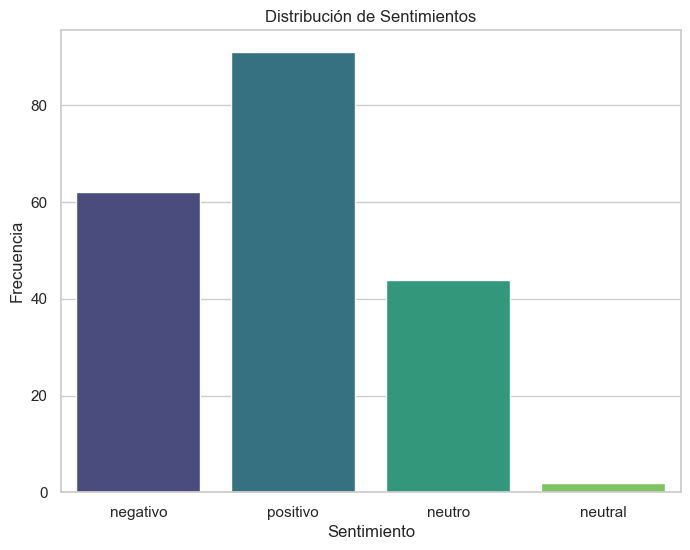

In [10]:
# Ejemplo de gráfico: Distribución de sentimientos
if df is not None and 'sentimiento' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='sentimiento', palette='viridis')
    plt.title("Distribución de Sentimientos")
    plt.xlabel("Sentimiento")
    plt.ylabel("Frecuencia")
    plt.show()

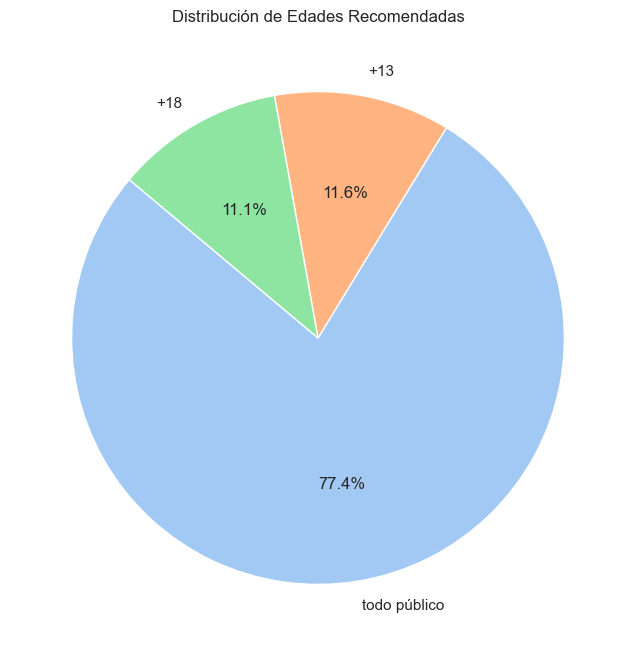

In [12]:
# Gráfico circular: Distribución de edades recomendadas
if df is not None and 'edad_recomendada' in df.columns:
    plt.figure(figsize=(8, 8))
    edades_counts = df['edad_recomendada'].value_counts()
    plt.pie(edades_counts, labels=edades_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title("Distribución de Edades Recomendadas")
    plt.show()
else:
    print("⚠️ La columna 'edad_recomendada' no está disponible en el DataFrame.")

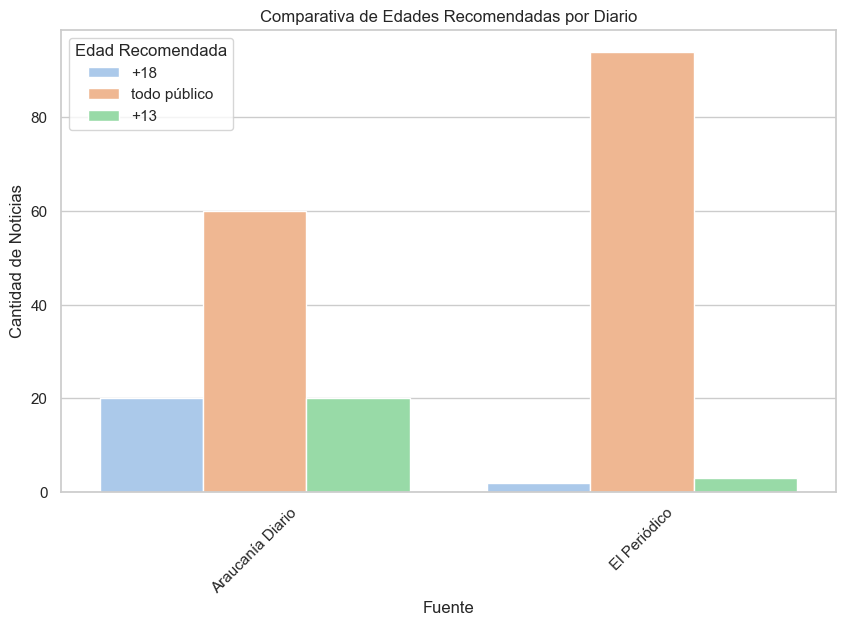

In [16]:
# Comparativa de edades recomendadas por diario
if df is not None and 'fuente' in df.columns and 'edad_recomendada' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='fuente', hue='edad_recomendada', palette='pastel')
    plt.title("Comparativa de Edades Recomendadas por Diario")
    plt.xlabel("Fuente")
    plt.ylabel("Cantidad de Noticias")
    plt.legend(title="Edad Recomendada")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⚠️ Las columnas 'fuente' o 'edad_recomendada' no están disponibles en el DataFrame.")